In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import pandas as pd
import os
import logging
# 使用多进程处理
import concurrent.futures

In [2]:
cleaned_all_products = pd.read_csv('./cleaned_all_products.csv')
cleaned_all_products

,index,smi1,smi2,product,pro_from_smi1_name,similarity
0,0,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4...,a1,0.888889
1,1,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1cccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c...,a1,0.888889
2,2,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1ccccc1-c1c2ccccc2c(-c2ccccc2)c2c(-c3ccccc3)...,a1,0.727273
3,6,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1cccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c...,a1,0.888889
4,7,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1ccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c4...,a1,0.888889
...,...,...,...,...,...,...
9522,51053,c1ccc2c(c1)Nc1ccccc1C21c2ccccc2Sc2ccccc21,C#N,N#Cc1cccc2c1Nc1ccccc1C21c2ccccc2Sc2ccccc21,p250,0.884615
9523,51061,c1ccc2c(c1)Nc1ccccc1C21c2ccccc2Sc2ccccc21,C#N,N#Cc1cccc2c1C1(c3ccccc3Nc3ccccc31)c1ccccc1S2,p250,0.920000
9524,51062,c1ccc2c(c1)Nc1ccccc1C21c2ccccc2Sc2ccccc21,C#N,N#Cc1ccc2c(c1)C1(c3ccccc3Nc3ccccc31)c1ccccc1S2,p250,0.920000
9525,51063,c1ccc2c(c1)Nc1ccccc1C21c2ccccc2Sc2ccccc21,C#N,N#Cc1ccc2c(c1)Sc1ccccc1C21c2ccccc2Nc2ccccc21,p250,0.920000


#### 选择pro_from_smi1_name为p114的所有行

In [3]:
filter_df = cleaned_all_products[cleaned_all_products['pro_from_smi1_name']=='p114']
filter_df

,index,smi1,smi2,product,pro_from_smi1_name,similarity
7562,36553,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,CBr,Cc1ccc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([n...,p114,0.962963
7563,36554,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,CBr,Cc1cc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([nH...,p114,0.962963
7564,36569,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,CBr,Cc1cc2[nH]c1c(-c1c(Cl)cccc1Cl)c1nc(c(-c3c(Cl)c...,p114,0.962963
7565,36594,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,BrBr,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,p114,0.962963
7566,36596,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,BrBr,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,p114,0.962963
7567,36626,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,BrBr,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3cc(B...,p114,0.962963
7568,36674,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,ClCl,Clc1ccc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([...,p114,1.000000
7569,36676,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,ClCl,Clc1cc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([n...,p114,1.000000
7570,36706,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,ClCl,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3cc(C...,p114,1.000000
7571,36754,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,II,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,p114,0.962963


测试含Se元素的分子

In [54]:
cleaned_all_products.iloc[5978]

index                                                             28448
smi1                  CC1=C(c2ccc[se]2)C(C)=[N+]2C1=C(c1c(C)cc(C)cc1...
smi2                                                                CBr
product               CC1=C(c2ccc[se]2)C(C)=[N+]2C1=C(c1c(C)cc(C)cc1...
pro_from_smi1_name                                                  p40
similarity                                                          1.0
Name: 5978, dtype: object

In [55]:
pro_smiles = cleaned_all_products['product'].values
index = cleaned_all_products.index
index[9522],pro_smiles[9522]

(9522, 'N#Cc1cccc2c1Nc1ccccc1C21c2ccccc2Sc2ccccc21')

In [56]:
cleaned_all_products.iloc[5978]['product']

'CC1=C(c2ccc[se]2)C(C)=[N+]2C1=C(c1c(C)cc(C)cc1C)c1c(C)c(-c3ccc(C)[se]3)c(C)n1[B-]2(F)F'

In [57]:
smiles = 'CC1=C(c2ccc[Se]2)C(C)=[N+]2C1=C(c1c(C)cc(C)cc1C)c1c(C)c(-c3ccc(C)[Se]3)c(C)n1[B-]2(F)F'
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
# 生成3D构象，使用 ETKDG 方法
embed_params = AllChem.ETKDGv3()
embed_status = AllChem.EmbedMolecule(mol, embed_params)
# AllChem.EmbedMolecule(mol, randomSeed=42)

[00:08:52] UFFTYPER: Unrecognized atom type: Se2+2 (7)
[00:08:52] UFFTYPER: Unrecognized atom type: Se2+2 (31)


查找有多少个含有Se的分子

In [58]:
def contains_se(smiles):
    """
    检查SMILES字符串是否包含硒（Se）元素。

    Parameters:
    - smiles (str): 分子的SMILES字符串。

    Returns:
    - bool: 如果包含Se元素，返回True，否则返回False。
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return any(atom.GetSymbol() == 'Se' for atom in mol.GetAtoms())
    return False

# 记录包含Se元素的分子索引
se_indices = []

for idx, smiles in enumerate(pro_smiles):
    if contains_se(smiles):
        se_indices.append(idx) 

In [64]:
len(se_indices)
# se_indices

80

In [73]:
import numpy as np
se_index = cleaned_all_products.loc[se_indices]
np.array(sorted(se_index['index'].values))

array([22352, 22356, 22364, 22372, 22380, 22912, 22918, 22930, 22942,
       22954, 28257, 28258, 28259, 28264, 28272, 28273, 28274, 28280,
       28282, 28284, 28294, 28310, 28312, 28314, 28324, 28326, 28328,
       28338, 28354, 28356, 28358, 28368, 28370, 28372, 28382, 28398,
       28400, 28402, 28411, 28412, 28413, 28418, 28426, 28427, 28428,
       28433, 28434, 28435, 28438, 28446, 28447, 28448, 28452, 28454,
       28456, 28462, 28478, 28480, 28482, 28488, 28490, 28492, 28498,
       28514, 28516, 28518, 28524, 28526, 28528, 28534, 28550, 28552,
       28554, 28559, 28560, 28561, 28564, 28572, 28573, 28574],
      dtype=int64)

In [18]:
set(cleaned_all_products.iloc[se_indices]['pro_from_smi1_name'])

{'a189', 'a201', 'p39', 'p40'}

In [19]:
'''删除含Se元素的分子'''
cleaned_all_pros_without_Se = cleaned_all_products.drop(index=se_indices, axis=0)

In [20]:
cleaned_all_pros_without_Se

,index,smi1,smi2,product,pro_from_smi1_name,similarity
0,0,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4...,a1,0.888889
1,1,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1cccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c...,a1,0.888889
2,2,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1ccccc1-c1c2ccccc2c(-c2ccccc2)c2c(-c3ccccc3)...,a1,0.727273
3,6,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1cccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c...,a1,0.888889
4,7,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1ccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c4...,a1,0.888889
...,...,...,...,...,...,...
9522,51053,c1ccc2c(c1)Nc1ccccc1C21c2ccccc2Sc2ccccc21,C#N,N#Cc1cccc2c1Nc1ccccc1C21c2ccccc2Sc2ccccc21,p250,0.884615
9523,51061,c1ccc2c(c1)Nc1ccccc1C21c2ccccc2Sc2ccccc21,C#N,N#Cc1cccc2c1C1(c3ccccc3Nc3ccccc31)c1ccccc1S2,p250,0.920000
9524,51062,c1ccc2c(c1)Nc1ccccc1C21c2ccccc2Sc2ccccc21,C#N,N#Cc1ccc2c(c1)C1(c3ccccc3Nc3ccccc31)c1ccccc1S2,p250,0.920000
9525,51063,c1ccc2c(c1)Nc1ccccc1C21c2ccccc2Sc2ccccc21,C#N,N#Cc1ccc2c(c1)Sc1ccccc1C21c2ccccc2Nc2ccccc21,p250,0.920000


# 在生成cleaned_all_products_without_Se时删除了80行含有Se元素的分子，因此原来的9527行变成了9447行，然后再生成3D构象和坐标文件时，设置了：indices = range(1, len(cleaned_all_products_without_Se) + 1)，即文件名为1-9447，与原来的

In [22]:
cleaned_all_pros_without_Se.to_csv('./cleaned_all_products_without_Se.csv', index=False)

In [39]:
pro_smiles = cleaned_all_pros_without_Se['product'].values
total = len(pro_smiles)
print(total)

9447


In [35]:
indices = range(1, len(cleaned_all_pros_without_Se) + 1)
indices

range(1, 9448)

In [36]:
filter_df = cleaned_all_pros_without_Se[cleaned_all_pros_without_Se['pro_from_smi1_name']=='p114']
filter_df

,index,smi1,smi2,product,pro_from_smi1_name,similarity
7562,36553,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,CBr,Cc1ccc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([n...,p114,0.962963
7563,36554,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,CBr,Cc1cc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([nH...,p114,0.962963
7564,36569,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,CBr,Cc1cc2[nH]c1c(-c1c(Cl)cccc1Cl)c1nc(c(-c3c(Cl)c...,p114,0.962963
7565,36594,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,BrBr,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,p114,0.962963
7566,36596,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,BrBr,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,p114,0.962963
7567,36626,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,BrBr,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3cc(B...,p114,0.962963
7568,36674,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,ClCl,Clc1ccc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([...,p114,1.000000
7569,36676,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,ClCl,Clc1cc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([n...,p114,1.000000
7570,36706,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,ClCl,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3cc(C...,p114,1.000000
7571,36754,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,II,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,p114,0.962963


In [24]:
len(set(filter_df['smi1'])),len(set(filter_df['product'])),len(filter_df['product'])

(1, 15, 15)

In [25]:
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

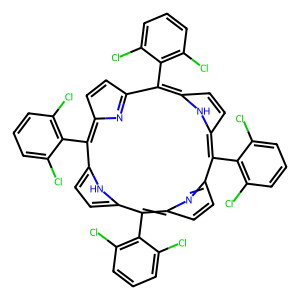

In [26]:
mol = AllChem.MolFromSmiles(filter_df['smi1'].values[0])
Draw.MolToImage(mol)

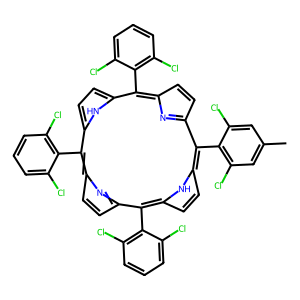

In [33]:
mol = AllChem.MolFromSmiles(filter_df['product'].values[1])
Draw.MolToImage(mol)

### 截止到目前为止，pro_from_smi1_name对应的smi1正确

解决- 'Mol' object has no attribute 'GetTotalCharge'-问题

In [67]:
cleaned_all_products[cleaned_all_products['pro_from_smi1_name']=='p192'].index

Int64Index([8412, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8421, 8422,
            8423, 8424, 8425, 8426],
           dtype='int64')

In [70]:
for i in cleaned_all_products[cleaned_all_products['pro_from_smi1_name']=='p193'].index:
#     print(i)
    smiles_with_charge = cleaned_all_products.iloc[i]['product']
    mol = Chem.MolFromSmiles(smiles_with_charge)
    mol = Chem.AddHs(mol)
    embed_status = AllChem.EmbedMolecule(mol, randomSeed=42)
    # 优化分子构象
    optimize_status = AllChem.UFFOptimizeMolecule(mol)
    charge = sum(atom.GetFormalCharge() for atom in mol.GetAtoms())
#     print(charge) 
    # charge = mol.GetTotalCharge()

解决-优化分子构象失败 (索引 X): XXXX(smiles表达式)-问题-----不是问题

In [139]:
# smiles = 'COCCC1=Cc2nc1ccc1[nH]c(c3nc(ccc4[nH]c2cc4CCO)C(CCOC)=C3)c(Br)c1CCOC'
# mol = Chem.MolFromSmiles(smiles_with_charge)
# mol = Chem.AddHs(mol)
# embed_status = AllChem.EmbedMolecule(mol, randomSeed=42)
# # 优化分子构象
# optimize_status = AllChem.UFFOptimizeMolecule(mol)
# optimize_status = AllChem.MMFFOptimizeMolecule(mol)
# print(optimize_status)

解决-无法为分子生成构象的问题------------不是问题

In [140]:
# smiles = 'CC1=CC(C)(c2cccnc2)C(B(C2C(C)=CC(C)=CC2(C)c2cccnc2)C2C(C)=CC(C)=CC2(C)c2cnccc2C)C(C)=C1'
# mol = Chem.MolFromSmiles(smiles_with_charge)
# mol = Chem.AddHs(mol)
# embed_status = AllChem.EmbedMolecule(mol, randomSeed=42)
# # 优化分子构象
# print(embed_status)

获取未能成功保存的336个分子的编号，查看什么情况

In [142]:
# '''
# indices = range(1, len(cleaned_all_products) + 1)
# index是从上述代码中返回的，
# 因此是返回的是df的索引，而不是df中的index列（该列的数值最大为5万多，是查重之前的索引）
# '''
# index = pd.read_csv('./gjf_files/missing_files.txt', )
# failed_gen_gjf_df = cleaned_all_pros_without_Se.iloc[index['index'].values]
# failed_gen_gjf_df = failed_gen_gjf_df.drop(columns=['index'],axis=1)
# failed_gen_gjf_df['fail_idx'] = failed_gen_gjf_df.index
# failed_gen_gjf_df.to_csv('./failed_gen_gjf_info.csv', index=False)
# pd.read_csv('./failed_gen_gjf_info.csv')

#### 开始生成3D

In [107]:
def generate_gaussian_input(smiles, index, output_dir, template_no_I, template_with_I):
    """
    生成单个Gaussian输入文件。

    Parameters:
    - smiles (str): 分子的SMILES字符串。
    - index (int): 分子的索引，用于命名文件。
    - output_dir (str): 输出文件夹路径。
    - template_no_I (str): 不含I元素的Gaussian模板。
    - template_with_I (str): 含I元素的Gaussian模板。

    Returns:
    - None
    """
    # 解析SMILES并添加氢原子
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    embed_status = AllChem.EmbedMolecule(mol, randomSeed=42)
    optimize_status = AllChem.MMFFOptimizeMolecule(mol)

    charge = sum(atom.GetFormalCharge() for atom in mol.GetAtoms())
    multiplicity = 1  # 根据您的需求设置

    has_I = any(atom.GetSymbol() == 'I' for atom in mol.GetAtoms())
    if has_I:
        template = template_with_I
    else:
        template = template_no_I

    chk_filename = f"{index}.chk"
    title = f"Molecule {index}"

    gaussian_job = template.format(
        chk=chk_filename,
        charge=charge,
        multiplicity=multiplicity,
        title=title
    )

    # 添加坐标
    coords = ""
    conformer = mol.GetConformer()
    for atom in mol.GetAtoms():
        pos = conformer.GetAtomPosition(atom.GetIdx())
        coords += f"{atom.GetSymbol():<3} {pos.x:>12.6f} {pos.y:>12.6f} {pos.z:>12.6f}\n"
    gaussian_job += coords + "\n"  # 坐标后添加一个空行

    # 如果含有I元素，添加基组定义
    if has_I:
        # 收集所有非I原子的唯一符号
        non_I_atoms = sorted({atom.GetSymbol() for atom in mol.GetAtoms() if atom.GetSymbol() != 'I'})
        if not non_I_atoms:
            logging.warning(f"分子 (索引 {index}) 含有I元素但没有其他非I原子。")
            return  # 或者根据需要处理这种情况

        # 定义基组部分，移除“Non-I atoms 0”行
        basis_I = f"""{' '.join(non_I_atoms)} 0
6-31G(d)
****
I 0
SDD
****

I 0
SDD

"""

        gaussian_job += basis_I  # 坐标后添加基组定义

    else:
        gaussian_job += "\n"  # 不含I元素，确保文件末尾有两个空行

    # 确保文件末尾有两个空行
    gaussian_job += "\n"

    # 写入文件
    gjf_filename = os.path.join(output_dir, f"{index}.gjf")
    with open(gjf_filename, 'w') as f:
        f.write(gaussian_job)

    logging.info(f"生成文件: {gjf_filename}")

In [109]:
def main():
    # 配置日志
    logging.basicConfig(filename='generate_gjf.log', level=logging.INFO,
                        format='%(asctime)s - %(levelname)s - %(message)s')
    # 载入 DataFrame
    # 请根据您的实际情况加载 'cleaned_all_products'
    # 例如：
    cleaned_all_products_without_Se = pd.read_csv('./cleaned_all_products_without_Se.csv')    
    pro_smiles = cleaned_all_products_without_Se['product'].values
    indices = range(1, len(cleaned_all_products_without_Se) + 1)

    output_dir = 'gjf_files'

    # 创建输出文件夹（如果不存在）
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 定义不含I元素的Gaussian模板
    template_no_I = """%nprocshared=128
%mem=20GB
%chk={chk}
#p opt freq b3lyp/6-31g(d) em=gd3bj pop=nboread

{title}

{charge} {multiplicity}
"""

    # 定义含I元素的Gaussian模板
    template_with_I = """%nprocshared=128
%mem=20GB
%chk={chk}
#p opt freq b3lyp/genecp em=gd3bj pop=nboread

{title}

{charge} {multiplicity}
"""
    total = len(pro_smiles)
    print(f"[信息] 总共需要处理 {total} 个分子。")
    logging.info(f"总共需要处理 {total} 个分子。")

    # 使用多进程处理
    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [
            executor.submit(
                generate_gaussian_input,smiles,idx,output_dir,template_no_I,template_with_I
            )
            for idx, smiles in zip(indices, pro_smiles)
        ]
        # 监控进度
        for count, future in enumerate(concurrent.futures.as_completed(futures), 1):
            if count % 100 == 0:
                print(f"[进度] 已完成 {count}/{total} 个分子的处理。")
                logging.info(f"已完成 {count}/{total} 个分子的处理。")

    print("[完成] 所有Gaussian输入文件已生成。")
    logging.info("所有Gaussian输入文件已生成。")

In [110]:
main()

[信息] 总共需要处理 336 个分子。
[进度] 已完成 100/336 个分子的处理。
[进度] 已完成 200/336 个分子的处理。
[进度] 已完成 300/336 个分子的处理。
[完成] 所有Gaussian输入文件已生成。


In [25]:
# 定义 SMILES 表示式
smiles = 'CCO'  # 乙醇的 SMILES 表示式

# 从 SMILES 创建分子对象
mol = Chem.MolFromSmiles(smiles)

# 添加氢原子
mol = Chem.AddHs(mol)

# 生成三维构象
AllChem.EmbedMolecule(mol, randomSeed=42)

# 优化分子构象
AllChem.UFFOptimizeMolecule(mol)

# 获取分子标题（可选）
title = 'Ethanol'

# 获取分子电荷和自旋多重度（根据需要修改）
charge = 0
multiplicity = 1

# 创建 Gaussian 输入文件内容
gaussian_input = f"""%chk={title}.chk
%mem=1GB
%nprocshared=4
#p B3LYP/6-31G(d) Opt

{title}

{charge} {multiplicity}
"""

# 获取原子符号和坐标
for atom in mol.GetAtoms():
    print(atom)
    pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())
    print(pos)
    print(f"{atom.GetSymbol():<3} {pos.x:>12.6f} {pos.y:>12.6f} {pos.z:>12.6f}\n")
    gaussian_input += f"{atom.GetSymbol():<3} {pos.x:>12.6f} {pos.y:>12.6f} {pos.z:>12.6f}\n"

gaussian_input += "\n"

# # 将 Gaussian 输入文件内容保存到文件
# with open(f"{title}.gjf", 'w') as f:
#     f.write(gaussian_input)

# print(f"Gaussian 输入文件已保存为 {title}.gjf")

C      -0.925662     0.073839     0.024394

C       0.513161    -0.419167    -0.068343

O       1.372196     0.452158     0.615059

H      -1.019089     1.071022    -0.455556

H      -1.599784    -0.639267    -0.495227

H      -1.233363     0.150362     1.088822

H       0.816132    -0.509506    -1.136190

H       0.582476    -1.425767     0.395381

H       1.493931     1.246325     0.031658

